# Library import 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats

In [2]:
import matplotlib

def get_font_family():
    import platform
    system_name = platform.system()

    if system_name == "Darwin" : # 맥
        font_family = "AppleGothic"
    elif system_name == "Windows": # 윈도우
        font_family = "Malgun Gothic"
    else: # 리눅스 및 코랩
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv
        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        font_family = "NanumBarunGothic"
    return font_family

plt.style.use("seaborn") # 전체 그래프를 seaborn 스타일로 고정
plt.rc("font", family=get_font_family())
matplotlib.rcParams['axes.unicode_minus'] = False # 그래프에 마이너스 허용

%config InlineBackend.figure_format = 'retina' # 그래프를 더 선명하게 사용


plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 120
plt.rcParams.update({'font.size': 12})

# Data Load

- 2022년 1년간의 광진구 유동인구 데이터를 분석

In [3]:
df = pd.read_csv("./data/result.csv", low_memory=False)

In [5]:
df.shape

(9159395, 10)

In [6]:
df.head()

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202201,일,0,11050,11010,F,15,EH,20,4.06
1,202201,일,0,11050,11010,F,20,EH,20,10.44
2,202201,일,0,11050,11010,F,25,EH,30,20.27
3,202201,일,0,11050,11010,F,25,WH,20,10.15
4,202201,일,0,11050,11010,F,30,EH,30,7.16


- 출발 시군구 코드가 11050(광진구)를 기준으로 따로 전처리 하였음

- 이동 유형은 H(야간상주지), W(주간상주지), E(기타 지역)를 의미합니다. 예) HW : 야간상주지에서 주간상주지로 이동
    - 생활이동 중 통근·통학 등 정기 통행과 쇼핑·여가 등의 비정기 통행을 판별하기 위해,  이동의 출발지와 도착지 유형을 구분한 것입니다. 
    - 일례로 야간상주지는 집,  주간상주지는 직장 또는 학교로 볼 수 있으며,  야간상주지에서 주간상주지로의 이동은 출근·등교 이동으로 해석할 수 있습니다.
    - 이동자 개인별로 1달 동안 새벽시간대(오전 5시 포함)에 오래 체류한 지역(60시간 이상)을 야간상주지로,  주간에 오래 체류한 지역을 주간상주지로 추정했습니다.
- https://data.seoul.go.kr/dataVisual/seoul/seoulLivingMigration.do

In [8]:
df["이동유형"].value_counts()

EH    1837479
HE    1739202
EE    1612166
WH    1008336
HW     856016
WE     831440
EW     714226
WW     329090
HH     231440
Name: 이동유형, dtype: int64

In [9]:
moving_cateogry = df["이동유형"].value_counts()

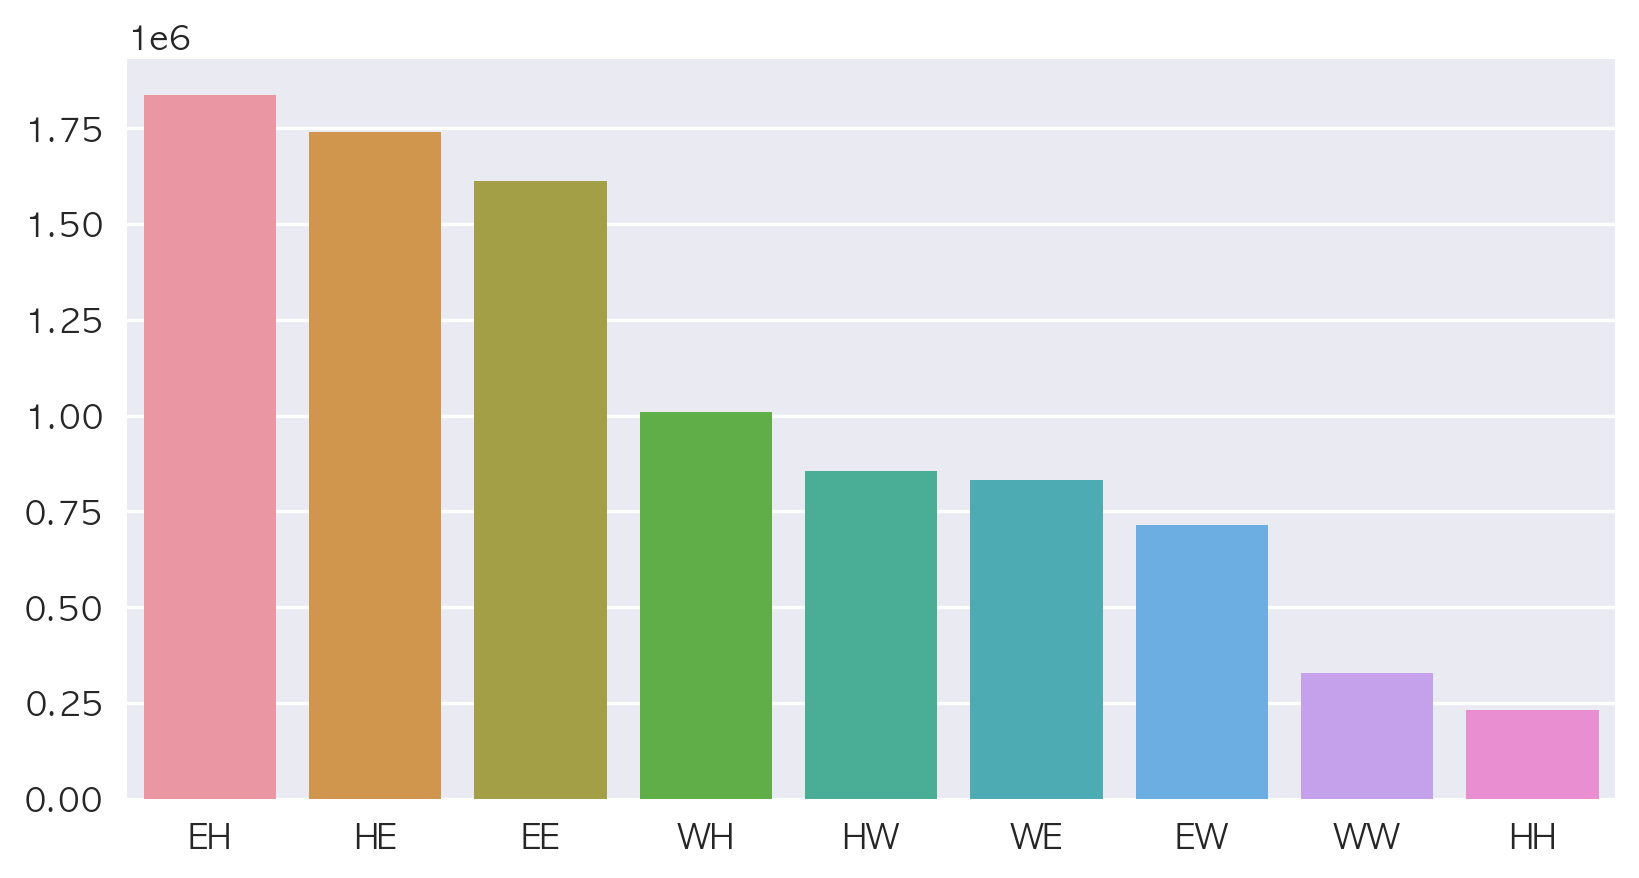

In [22]:
sns.barplot(x=moving_cateogry.index, y=moving_cateogry.values)
plt.show()

- EH와 HE가 가장 높은 것을 통하여 기타 지역에서 직장 및 학교(주간상주지) 혹은 그 반대의 이동이 가장 많은 것을 확인 할 수 있다.
    - 세종대학교가 광진구에 위치하였기 때문이라고 추정
- EE유형 : 기타에서 기타 (놀려고 방문이라 추정) 이동 유형의 경우에도 3번째로 높은 수를 차지하였는데 이는 놀러오는 사람의 비율또한 상당히 높게 나타나는 것으로 추정됨

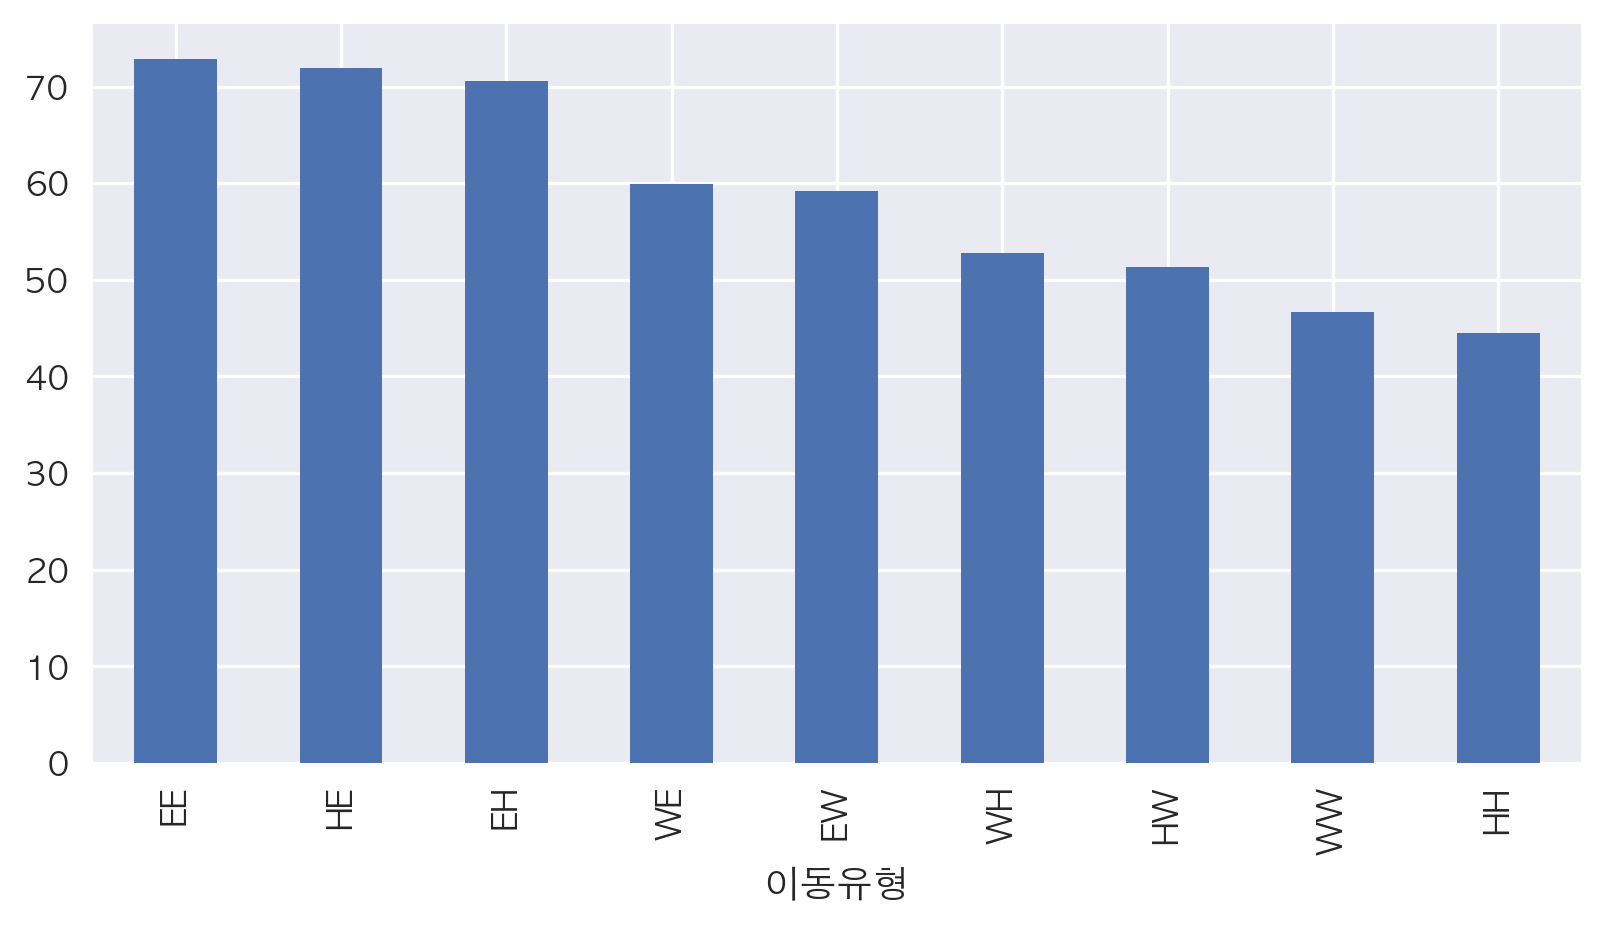

In [24]:
df.groupby("이동유형").mean()["평균 이동 시간(분)"].sort_values(ascending=False).plot(kind = "bar")
plt.show()

- 기타에서 기타의 이동 유형이 평균 이동 시간이 가장 높게 나타났고 그 이외에 야간 상주지에서 기타로의 이동이 많다
- 이는 광진구의 유동인구가 많다는 사실을 확인할 수 있다.

In [27]:
df.groupby("성별").mean()

,대상연월,도착시간,출발 시군구 코드,도착 시군구 코드,나이,평균 이동 시간(분)
성별,,,,,,
F,202206.667286,13.813133,11050.0,19186.137180,40.676342,62.071783
M,202206.630456,13.248676,11050.0,20022.374557,42.459856,65.748671


In [7]:
men = df[df["성별"] == "M"]
women = df[df["성별"] == "F"]

In [13]:
men_age = men["나이"]
women_age = women["나이"]

In [16]:
men_time = men["평균 이동 시간(분)"]
women_time = women["평균 이동 시간(분)"]

In [18]:
men_arrive_time = men["도착시간"]
women_arrive_time = women["도착시간"]

In [14]:
scipy.stats.ttest_ind(men_age, women_age, equal_var=False)

Ttest_indResult(statistic=146.80867153787725, pvalue=0.0)

In [17]:
scipy.stats.ttest_ind(men_time, women_time, equal_var=False)

Ttest_indResult(statistic=82.50234332518555, pvalue=0.0)

In [19]:
scipy.stats.ttest_ind(men_arrive_time, women_arrive_time, equal_var=False)

Ttest_indResult(statistic=-140.5588083101579, pvalue=0.0)

- t 검정을 통하여 여성과 남성 간의 나이, 평균 이동 시간, 도착 시간의 평균의 차이는 통계적으로 유의하다는 것을 확인

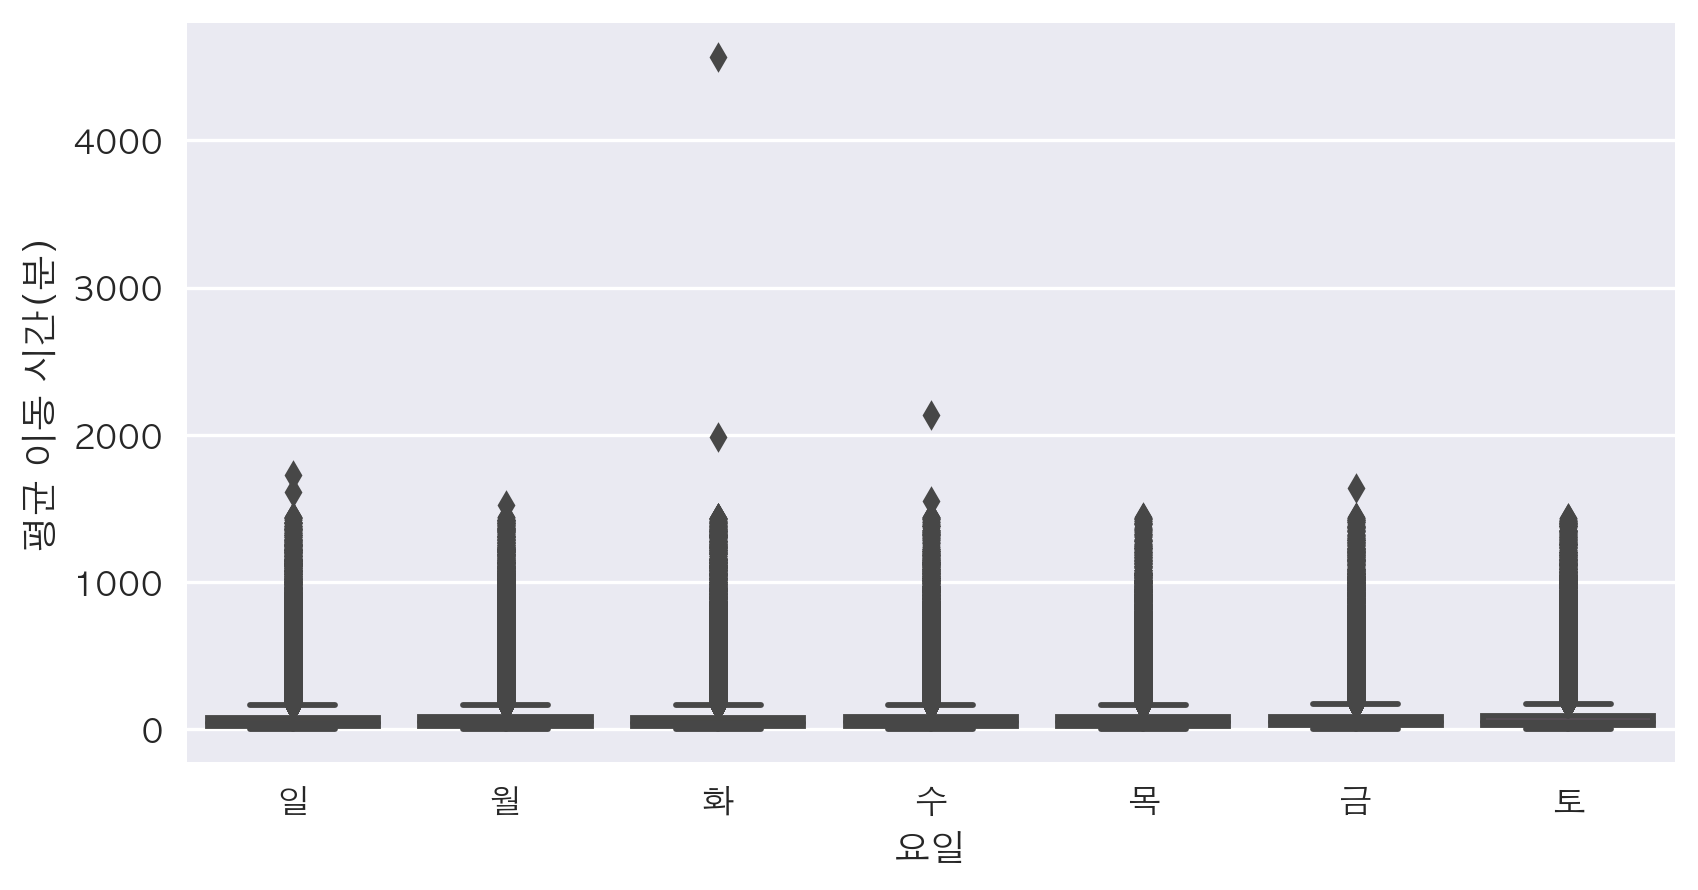

In [39]:
sns.boxplot(y = df["평균 이동 시간(분)"], x=df["요일"])
plt.show()

- outlier존재, 화요일에 상당히 차이가 큰 outlier도 존재하는 것을 확인할 수 있다.

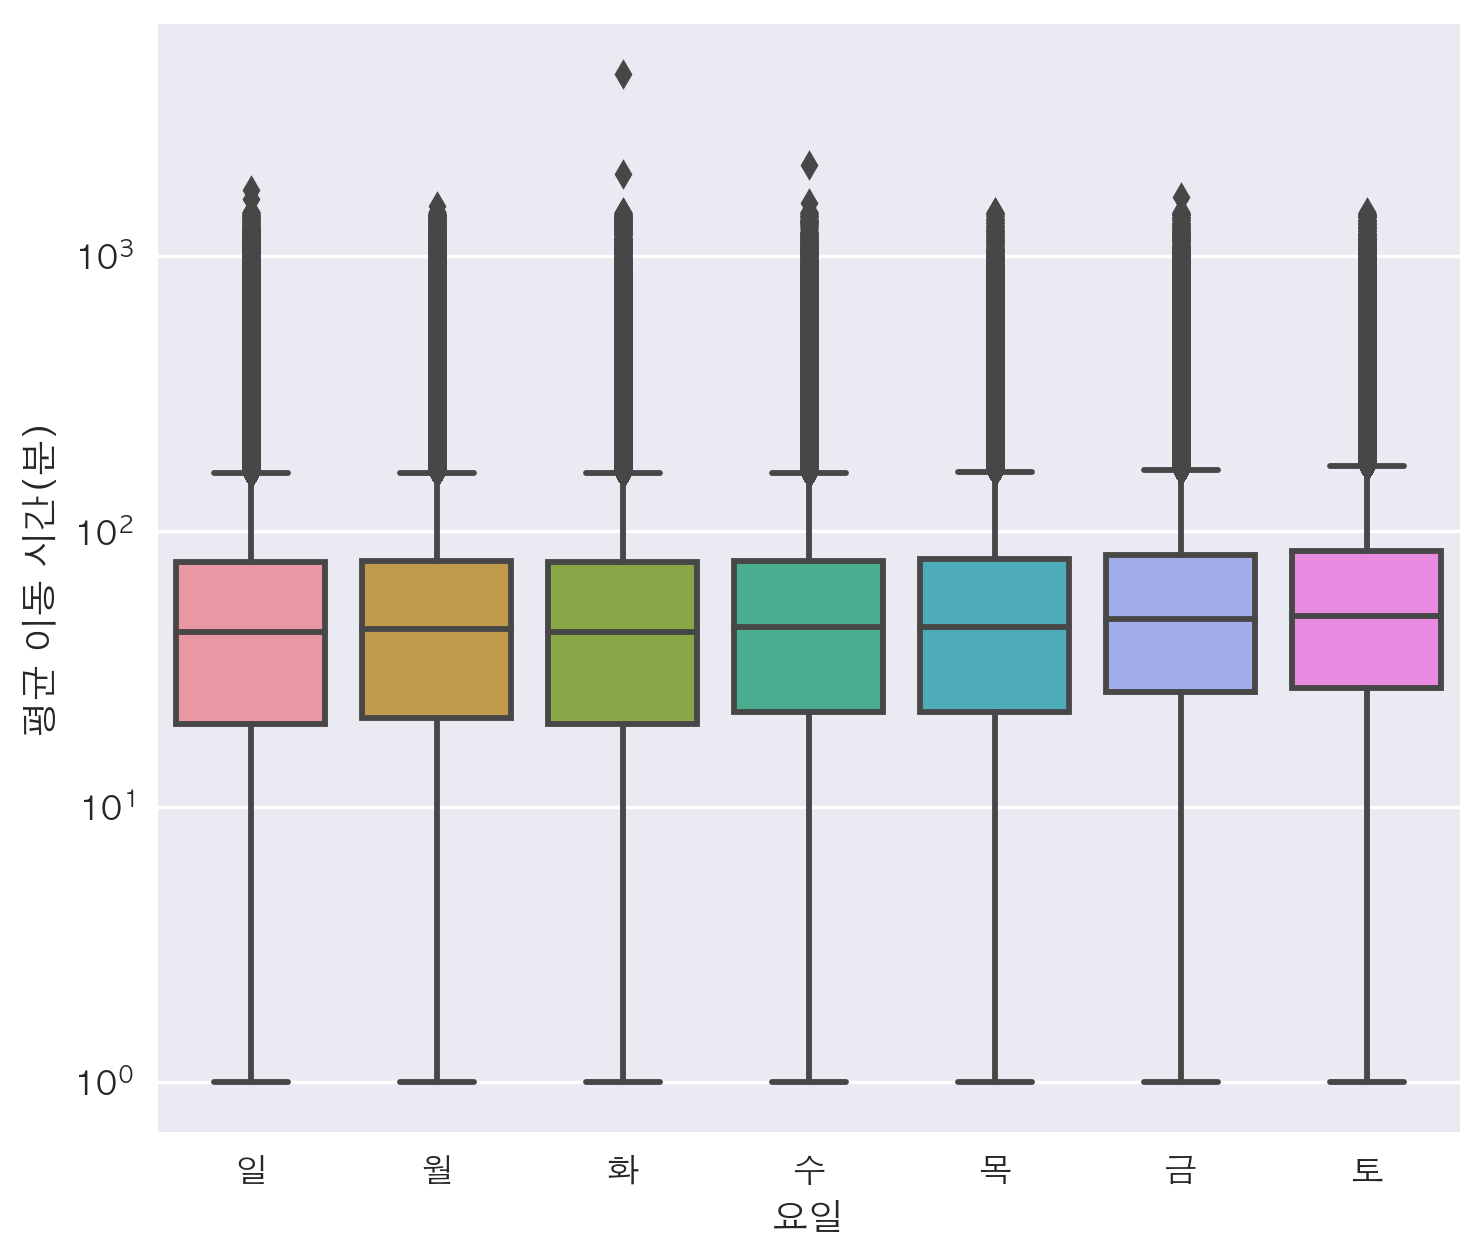

In [42]:
f, ax = plt.subplots(figsize=(7, 6))
ax.set_yscale("log")
sns.boxplot(y = df["평균 이동 시간(분)"], x=df["요일"])
plt.show()

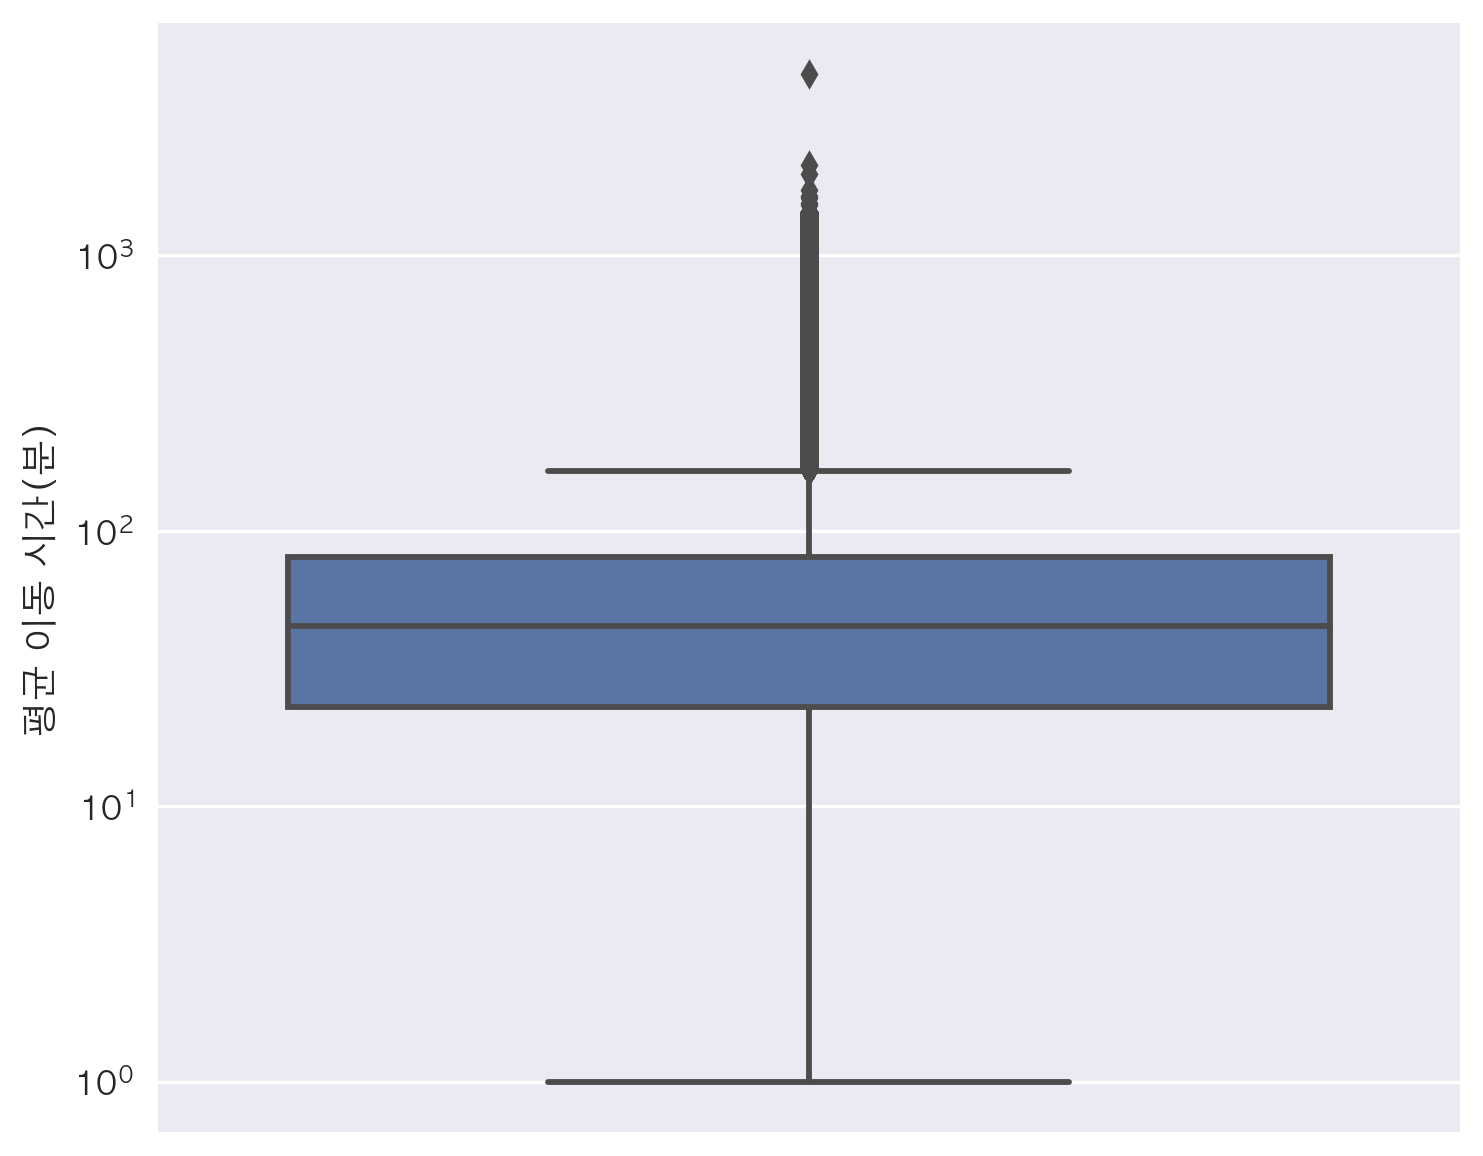

In [43]:
f, ax = plt.subplots(figsize=(7, 6))
ax.set_yscale("log")
sns.boxplot(y = df["평균 이동 시간(분)"])
plt.show()

In [49]:
iqr = np.subtract(*np.quantile(df["평균 이동 시간(분)"], [0.75, 0.25]))

In [51]:
len(df[df["평균 이동 시간(분)"] >= (iqr * 1.5 + np.quantile(df["평균 이동 시간(분)"], 0.75))])

540182

- 총 9159395의 데이터 중 540182가량의 데이터가 이상치 인것을 확인

In [25]:
group_mon = df[df["요일"] == "월"]
group_tue = df[df["요일"] == "화"]
group_web = df[df["요일"] == "수"]
group_thu = df[df["요일"] == "목"]
group_fri = df[df["요일"] == "금"]
group_sat = df[df["요일"] == "토"]
group_sun = df[df["요일"] == "일"]

In [54]:
group_mon["평균 이동 시간(분)"]

2964        10
2965        20
2966        30
2967        20
2968        20
          ... 
9137265    236
9137266    404
9137267    247
9137268    264
9137269     57
Name: 평균 이동 시간(분), Length: 1272437, dtype: int64

In [56]:
F_statistic, pVal = scipy.stats.f_oneway(group_mon["평균 이동 시간(분)"], group_tue["평균 이동 시간(분)"], group_web["평균 이동 시간(분)"], group_thu["평균 이동 시간(분)"],
                                          group_fri["평균 이동 시간(분)"], group_sat["평균 이동 시간(분)"], group_sun["평균 이동 시간(분)"])

print('일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))

일원분산분석 결과 : F=1717.3, p=0.00000


- 분산분석의 결과로 서로간의 평균의 차이가 유의하다는 것을 확인하였음

In [57]:
df["요일"].value_counts()

토    1410618
금    1362992
목    1297883
수    1280854
월    1272437
화    1271710
일    1262901
Name: 요일, dtype: int64

In [59]:
scipy.stats.levene(group_mon["평균 이동 시간(분)"], group_tue["평균 이동 시간(분)"], group_web["평균 이동 시간(분)"], group_thu["평균 이동 시간(분)"],
                                          group_fri["평균 이동 시간(분)"], group_sat["평균 이동 시간(분)"], group_sun["평균 이동 시간(분)"], center="mean")

LeveneResult(statistic=1703.6404971240702, pvalue=0.0)

- Levene 검정을 통하여 각 집단 간의 분산이 차이가 있다(이분산성)을 만족
- 분산분석의 사후 검정으로 본페로니 검정 사용

In [80]:
group_mon = group_mon[["요일", "평균 이동 시간(분)"]]
group_tue = group_tue[["요일", "평균 이동 시간(분)"]]
group_web = group_web[["요일", "평균 이동 시간(분)"]]
group_thu = group_thu[["요일", "평균 이동 시간(분)"]]
group_fri = group_fri[["요일", "평균 이동 시간(분)"]]
group_sat = group_sat[["요일", "평균 이동 시간(분)"]]
group_sun = group_sun[["요일", "평균 이동 시간(분)"]]

In [84]:
df_all = pd.concat([group_mon, group_tue, group_web, group_thu, group_fri, group_sat, group_sun], axis=0)

In [85]:
from statsmodels.sandbox.stats.multicomp import MultiComparison

In [86]:
comp = MultiComparison(df_all["평균 이동 시간(분)"], df_all["요일"])

In [87]:
result = comp.allpairtest(scipy.stats.ttest_ind, method='bonf')
result[0]

group1,group2,stat,pval,pval_corr,reject
금,목,41.3436,0.0,0.0,True
금,수,48.6621,0.0,0.0,True
금,월,34.5554,0.0,0.0,True
금,일,53.9783,0.0,0.0,True
금,토,-14.6529,0.0,0.0,True
금,화,63.1259,0.0,0.0,True
목,수,7.6769,0.0,0.0,True
목,월,-5.1883,0.0,0.0,True
목,일,13.5259,0.0,0.0,True
목,토,-55.9634,0.0,0.0,True


- 사후 검정 결과로 모든 날짜간의 평균 이동 시간에 차이가 있다는 것을 확인 할 수 있다.

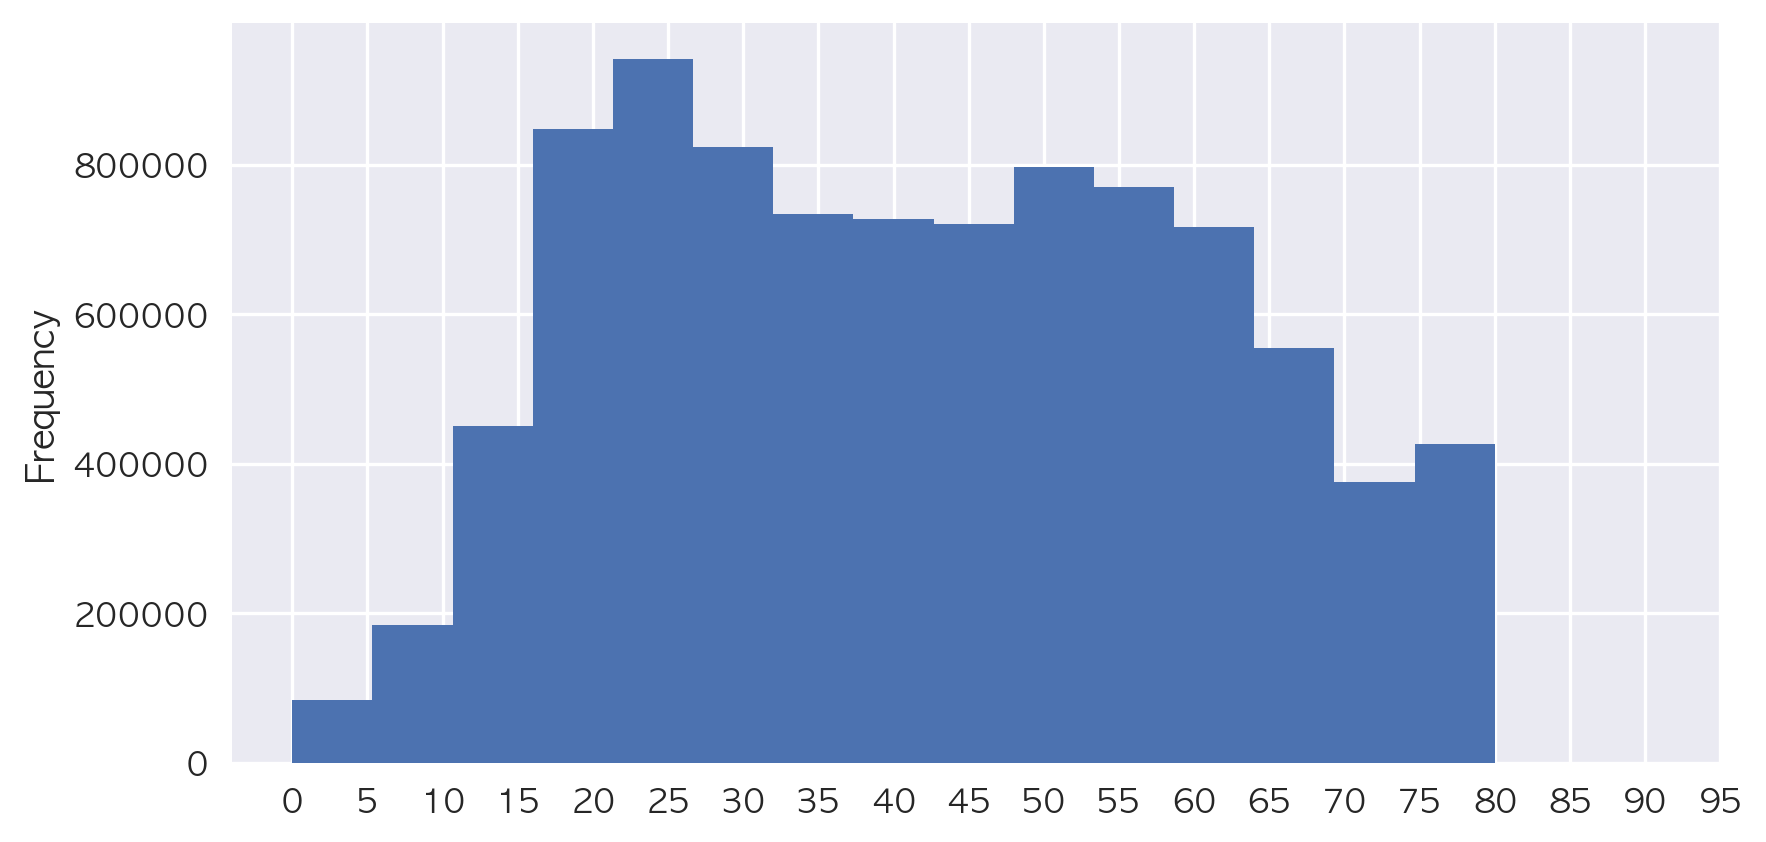

In [8]:
df["나이"].plot(kind="hist", bins=15)
plt.xticks(range(0, 100, 5))
plt.show()

In [5]:
df["나이"].mean()

41.66470984164347

In [6]:
df["나이"].median()

40.0

In [7]:
df["나이"].mode()

0    25
Name: 나이, dtype: int64

- 평균과 중앙값은 약 40세이고 최빈값은 25세이다.
- 위의 히스토그램을 통해서도 15에서 25살까지가 가장 많이 있는 것을 확인 할 수 있다.
- 또한 15세 이하의 데이터가 적은 걸 통하여 두가지 가설을 세울 수 있음
    1. 휴대폰을 통하여 인구를 추정하는 것이기에 휴대폰이 없기 때문에 유동 인구가 적게 측정되었다.
    2. 실제로 광진구 유동인구에서 15세 미만이 적다

    - 하지만 두 가설다 주차문제와는 크게 연관이 없다고 생각하기에 문제가 되지 않음 (해결할 필요가 없음)